# Muestreo aleatorio simple

En este código se muestran unos ejemplos en los cuales se aplica un muestreo aleatorio simple a diferentes conjuntos de datos. Los conjuntos de datos se encuentran en el espacion R^2, con la finalidad de poder visualizarse de forma sencilla. También se hacen algunas pruebas en las cuales se aplican algoritmos de aprendizaje máquina para comparar las diferencias entre el conjunto original y le conjunto sub-muestreado con aleatorio simple.

## Ejemplo 1: conjunto de datos balanceado con una dispersión normal y tres clases

### Construcción de la Población simulada

Se construye con conjunto de datos con un total de 500 instancias, distribuidas de forma equitativa entre las clases.

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
from sklearn.datasets import make_blobs

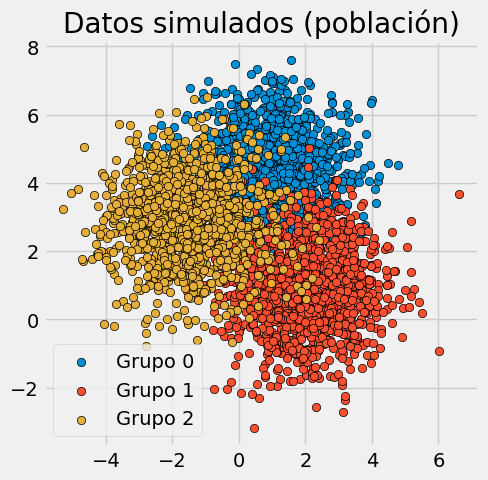

In [3]:
#Datos simulados
# ==============================================================================
#data, lables =
X, y = make_blobs(
        n_samples    = 4000,
        n_features   = 2,
        centers      = 3,
        cluster_std  = 1.2,
        shuffle      = True,
        random_state = 0
       )

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for i in np.unique(y):
    ax.scatter(
        x = X[y == i, 0],
        y = X[y == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Grupo {i}"
    )

ax.set_title('Datos simulados (población)')
ax.legend()
plt.show()

### Construcción de una muestra de la población

Se procede a construir una Muestra de la Población. Para el ejemplo, la muestra tendrá un 10% del tamaño de la población (se puede variar este procentaje para observar el impacto en los resultados). Para ello, los datos son transformados a un Pandas Dataframe, para usar la función de "sample" para aplicar el muestreo aleatorio simple.

In [4]:
#se construye un dataframe de pandas a partir del arreglo X de datos
df_poblacion1 = pd.DataFrame(X)

In [5]:
#Se añade la columna clase al dataframe
df_poblacion1['class'] = pd.DataFrame(y)
df_poblacion1

,0,1,class
0,0.314074,5.472172,2
1,-0.409291,3.803835,2
2,1.213831,5.602110,0
3,2.394482,-0.413385,1
4,1.723293,3.546357,0
...,...,...,...
3995,0.508635,-0.324877,1
3996,0.827891,4.909751,0
3997,1.947286,2.866076,0
3998,0.581901,3.750197,2


In [7]:
statistics_global = []
delta = 100
df_sample_n = pd.DataFrame()
df_pob = df_poblacion1.copy()

for i in range(delta, 4000, delta):
    #se genera una muestra de la poblacion
    df_tmp = df_pob.sample(n = delta) #muestreo aleatorio simple
    df_sample_n = pd.concat([df_sample_n, df_tmp])
    #se eliminan los registros de la muestra de la población
    df_pob = df_poblacion1.drop(df_tmp.index)
    #se separan los datos por clases
    df_sample_classes = []
    for j in np.unique(df_sample_n['class']):
        df_sample_classes.append(df_sample_n[df_sample_n['class'] == j])

    #se calcula la media de cada columna de df_sample_classes
    for k in range(len(df_sample_classes)):
        statistics_global.append([df_sample_classes[k][0].mean(), df_sample_classes[k][1].mean(),k,i])

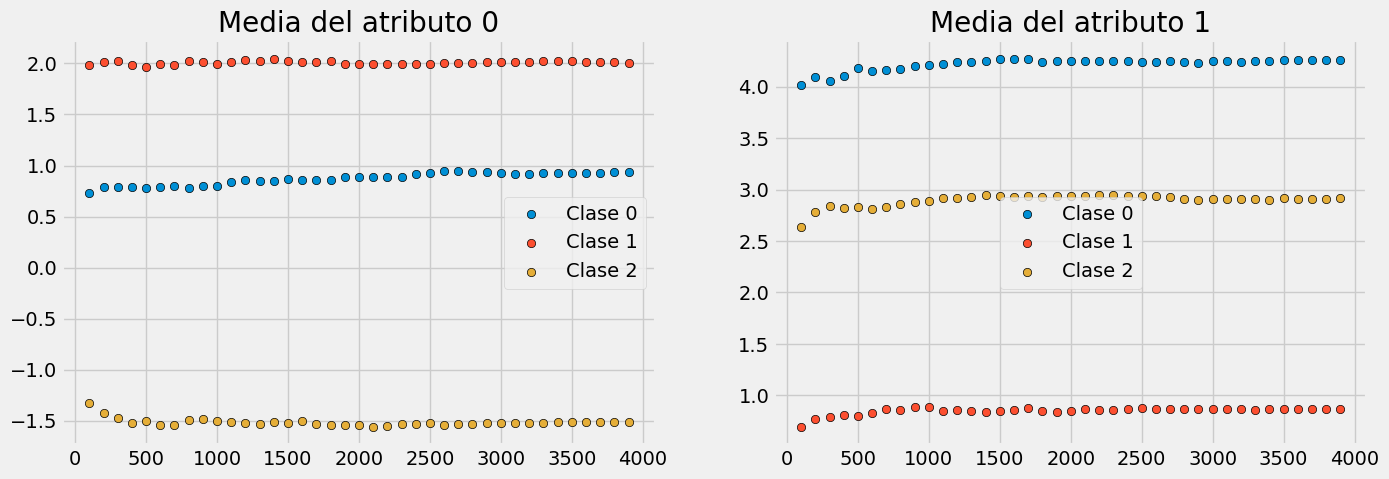

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax = ax.flatten()
for i in range(0,3):
    ax[0].scatter(
        x = [t[3] for t in statistics_global if t[2] == i],
        y = [t[0] for t in statistics_global if t[2] == i],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Clase {i}"
    )
ax[0].set_title('Media del atributo 0')
ax[0].legend()

for i in range(0,3):
    ax[1].scatter(
        x = [t[3] for t in statistics_global if t[2] == i],
        y = [t[1] for t in statistics_global if t[2] == i],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Clase {i}"
    )

ax[1].set_title('Media del atributo 1')
ax[1].legend()
plt.show()

In [42]:
# CONSTRUCCION DE LA MUESTRA
# Aquí se define el tamaño de la muestra a generar
df_sample1 = df_poblacion1.sample(n = 1700)
# Nota: el experimento son con los parametros de la población discutida en clase, con un factor de cambio del tamaño de la muestra = 20,
# iniciando en 20
# 1. separar los datos en df_sample1 en estratos (clase = 0, 1, 2)
# 2. Calcular la media y desv estandar de cada dimension de cada estrato

df_sample1

,0,1,class
676,1.196981,3.841200,0
538,3.195780,4.046787,0
3233,-2.470038,2.172821,2
711,-2.123086,2.919047,0
2511,0.101416,4.539656,0
...,...,...,...
1642,1.353101,4.751239,0
2295,-1.711255,4.785586,0
92,2.305147,-0.924979,1
1331,0.192051,3.429848,1


In [43]:
#se separan las instancias para poder imprimirse en pantalla
X_sample1 = df_sample1[[0,1]].to_numpy()
y_sample1 = df_sample1['class'].to_numpy()

1700


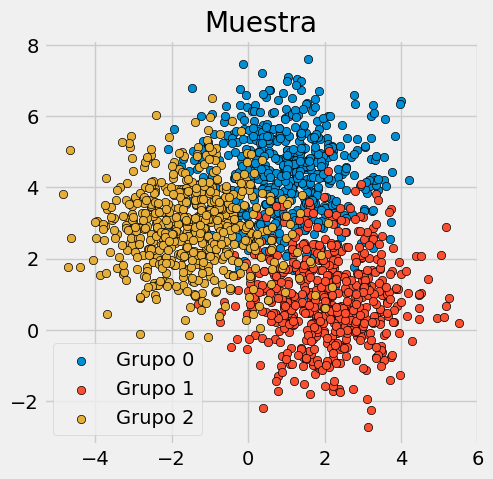

In [44]:
print(len(X_sample1))
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for i in np.unique(y_sample1):
    ax.scatter(
        x = X_sample1[y_sample1 == i, 0],
        y = X_sample1[y_sample1 == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Grupo {i}"
    )

ax.set_title('Muestra')
ax.legend()
plt.show()

### Construyendo un training y test aleatorio de la Población

In [45]:
from sklearn.model_selection import train_test_split

Se genera la configuración para construir el conjunto training y el conjunto test. Para el ejemplo, se usará una configuración tipica de 80% - 20% con un muestreo aleatorio simple.

In [46]:
# Se genera la división 80% - 20% con un muestreo aleatorio simple sobre la población
train1, test1, train1_lables, test1_lables = train_test_split(X, y, test_size = 0.3)

### Construyendo un training y un test de la Muestra

In [47]:
train2, test2, train2_lables, test2_lables = train_test_split(X_sample1, y_sample1, test_size = 0.3)


### Gráficas del training-test de la población y training-test de la muestra

Se generan las gráficas para poder visualizar como quedó el conjunto training y el conjunto test.

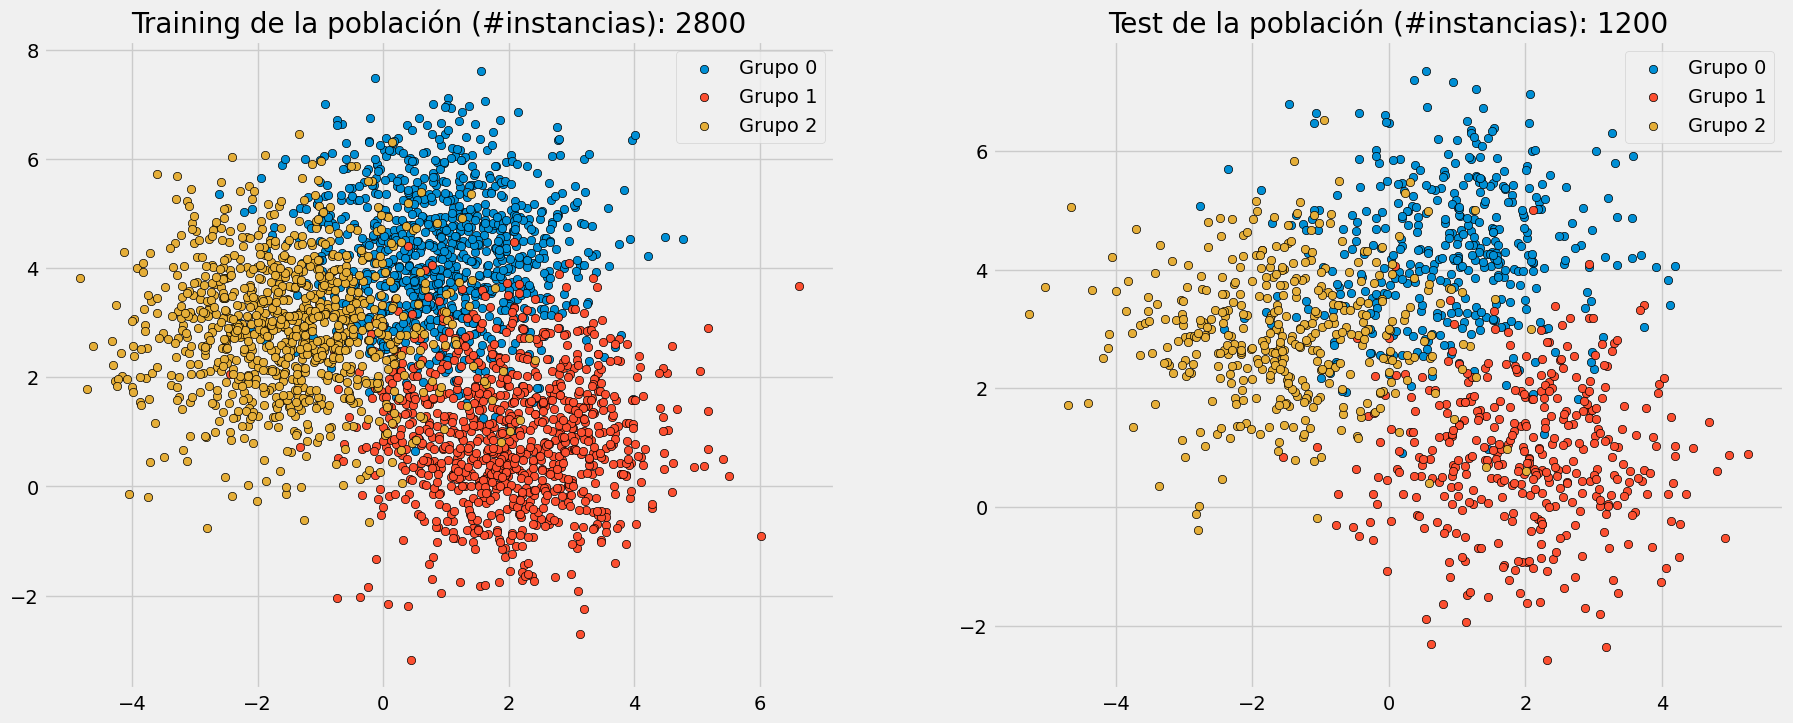

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax = ax.flatten()
for i in np.unique(train1_lables):
    ax[0].scatter(
        x = train1[train1_lables == i, 0],
        y = train1[train1_lables == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Grupo {i}"
    )
legend = 'Training de la población (#instancias): ' + str(len(train1))
ax[0].set_title(legend)
ax[0].legend()

for i in np.unique(test1_lables):
    ax[1].scatter(
        x = test1[test1_lables == i, 0],
        y = test1[test1_lables == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Grupo {i}"
    )
legend = 'Test de la población (#instancias): ' + str(len(test1))
ax[1].set_title(legend)
ax[1].legend()
plt.show()


Se imprimen las gráficas sobre la muestra (dividida en training y test)

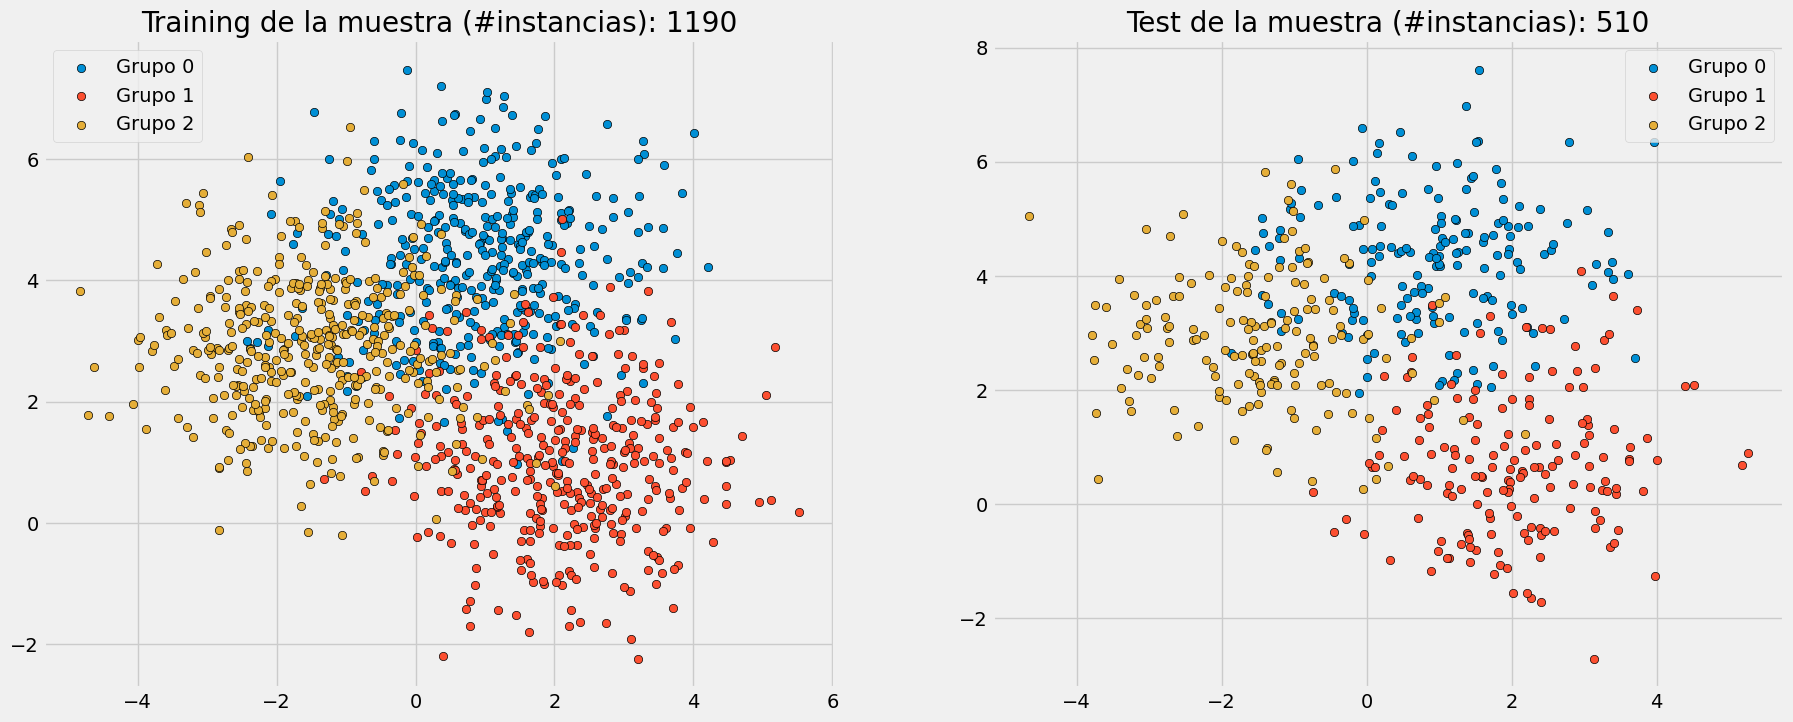

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax = ax.flatten()
for i in np.unique(train2_lables):
    ax[0].scatter(
        x = train2[train2_lables == i, 0],
        y = train2[train2_lables == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Grupo {i}"
    )
legend = 'Training de la muestra (#instancias): ' + str(len(train2))
ax[0].set_title(legend)
ax[0].legend()

for i in np.unique(test2_lables):
    ax[1].scatter(
        x = test2[test2_lables == i, 0],
        y = test2[test2_lables == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Grupo {i}"
    )
legend = 'Test de la muestra (#instancias): ' + str(len(test2))
ax[1].set_title(legend)
ax[1].legend()
plt.show()
